### Import libraries...

In [97]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


### Load the dataset

In [98]:
df = pd.read_csv('C:\\Users\\NEW\\Downloads\\archive (11).zip')
df

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


### Pre process

In [99]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [100]:
# Convert 'Bitcoin_Price' and 'Berkshire_Price' to numeric, removing commas
df['Bitcoin_Price'] = df['Bitcoin_Price'].str.replace(',', '').astype(float)
df['Ethereum_Price'] = df['Ethereum_Price'].str.replace(',', '').astype(float)
df['S&P_500_Price'] = df['S&P_500_Price'].str.replace(',', '').astype(float)
df['Nasdaq_100_Price'] = df['Nasdaq_100_Price'].str.replace(',', '').astype(float)
df['Berkshire_Price'] = df['Berkshire_Price'].str.replace(',', '').astype(float)
df['Gold_Price'] = df['Gold_Price'].str.replace(',', '').astype(float)


In [101]:
df

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.2,...,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.0
1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.8,...,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.0
1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.1,...,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.0
1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,...,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.0


In [102]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # For "DD-MM-YYYY" format

df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6


# Identifying price and volume columns
price_columns = [col for col in df.columns if 'Price' in col]
volume_columns = [col for col in df.columns if 'Vol' in col]

# Fill price columns
for col in price_columns:
    # Linear interpolation for initial filling
    df[col] = df[col].interpolate(method='linear')
    
    # Adjust for weekends
    for i in range(len(df)):
        if pd.isnull(df.loc[i, col]):
            if df.loc[i, 'DayOfWeek'] in [5, 6]:  # Saturday or Sunday
                # Use previous day's price if available
                if i > 0 and pd.notnull(df.loc[i-1, col]):
                    df.loc[i, col] = df.loc[i-1, col]

# Fill volume columns
for col in volume_columns:
    for i in range(len(df)):
        if pd.isnull(df.loc[i, col]):
            if df.loc[i, 'DayOfWeek'] in [5, 6]:  # Saturday or Sunday
                df.loc[i, col] = 0
            else:
                # Use mean of previous and next day's volume if available
                prev_val = next_val = None
                if i > 0:
                    prev_val = df.loc[i-1, col]
                if i < len(df) - 1:
                    next_val = df.loc[i+1, col]
                if pd.notnull(prev_val) and pd.notnull(next_val):
                    df.loc[i, col] = (prev_val + next_val) / 2
                elif pd.notnull(prev_val):
                    df.loc[i, col] = prev_val
                elif pd.notnull(next_val):
                    df.loc[i, col] = next_val

# Drop the 'DayOfWeek' column if no longer needed
df.drop('DayOfWeek', axis=1, inplace=True)

In [103]:
df

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,NaN,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,260920.0
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2019-02-08,2.583,147880.0,52.72,621000.0,2.8140,270.0,3661.7,699230.0,802.2,...,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.0
1239,2019-02-07,2.551,211790.0,52.64,749010.0,2.8320,320.0,3397.7,471360.0,800.8,...,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.0
1240,2019-02-06,2.662,98330.0,54.01,606720.0,2.8400,100.0,3404.3,514210.0,807.1,...,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.0
1241,2019-02-05,2.662,82250.0,53.66,609760.0,2.8205,90.0,3468.4,460950.0,821.35,...,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.0


### E D A (Exploratory Data Analysis)

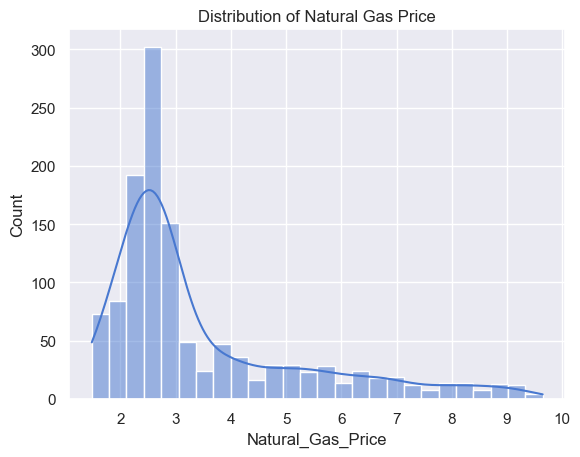

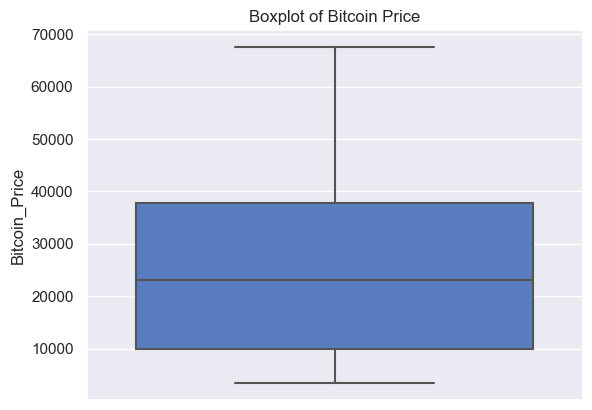

In [104]:
# Histogram of a specific variable, e.g., 'Natural_Gas_Price'
sns.histplot(df['Natural_Gas_Price'], kde=True)
plt.title('Distribution of Natural Gas Price')
plt.show()

# Boxplot for another variable, e.g., 'Bitcoin_Price'
sns.boxplot(y=df['Bitcoin_Price'])
plt.title('Boxplot of Bitcoin Price')
plt.show()

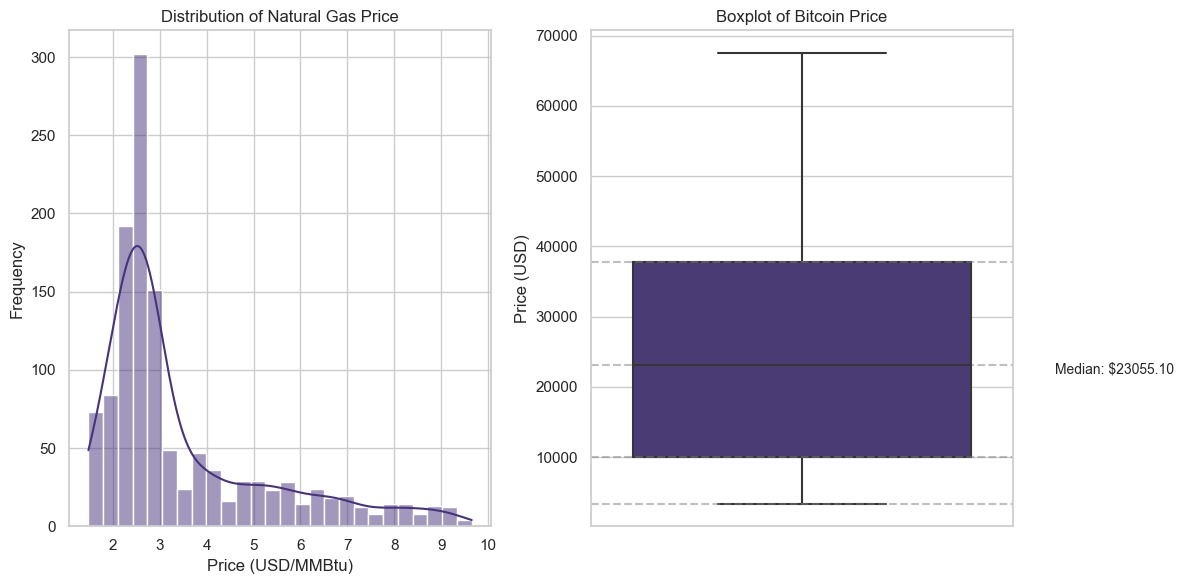

In [105]:
# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of Natural Gas Price
sns.histplot(df['Natural_Gas_Price'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Natural Gas Price')
axs[0].set_xlabel('Price (USD/MMBtu)')
axs[0].set_ylabel('Frequency')

# Boxplot of Bitcoin Price
sns.boxplot(y=df['Bitcoin_Price'], ax=axs[1])
axs[1].set_title('Boxplot of Bitcoin Price')
axs[1].set_ylabel('Price (USD)')

# Adding horizontal lines for quartiles
for i in range(4):
    axs[1].axhline(df['Bitcoin_Price'].quantile(i/4), linestyle='--', color='gray', alpha=0.5)

# Adding median annotation
median_price = df['Bitcoin_Price'].median()
axs[1].annotate('Median: ${:.2f}'.format(median_price), xy=(0.5, median_price), xytext=(0.6, median_price*0.95),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.tight_layout()
plt.show()


for an instance, let me see the share price growth of apple company and their volume of shares...

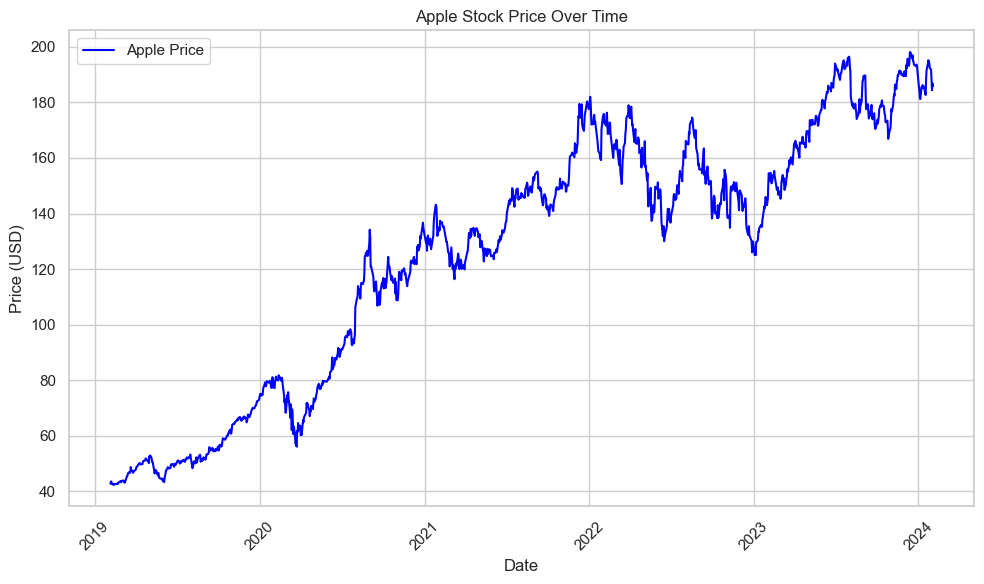

In [106]:

# Plotting Apple Price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Apple_Price'], color='blue', label='Apple Price')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Apple Stock Price Over Time')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


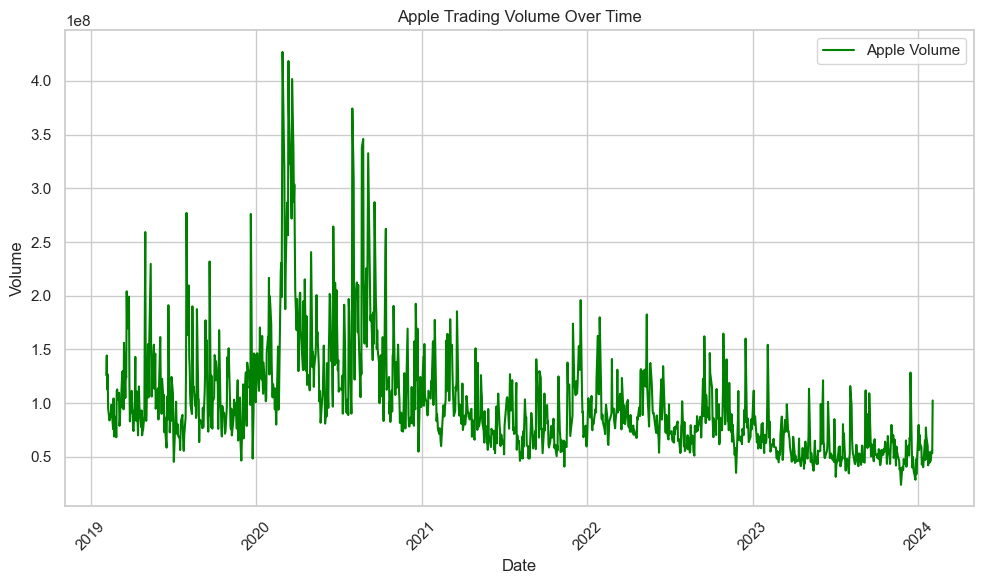

In [107]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Apple Volume
ax.plot(df['Date'], df['Apple_Vol.'], color='green', label='Apple Volume')

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Apple Trading Volume Over Time')
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Let see the price of the products over the time by different methods...

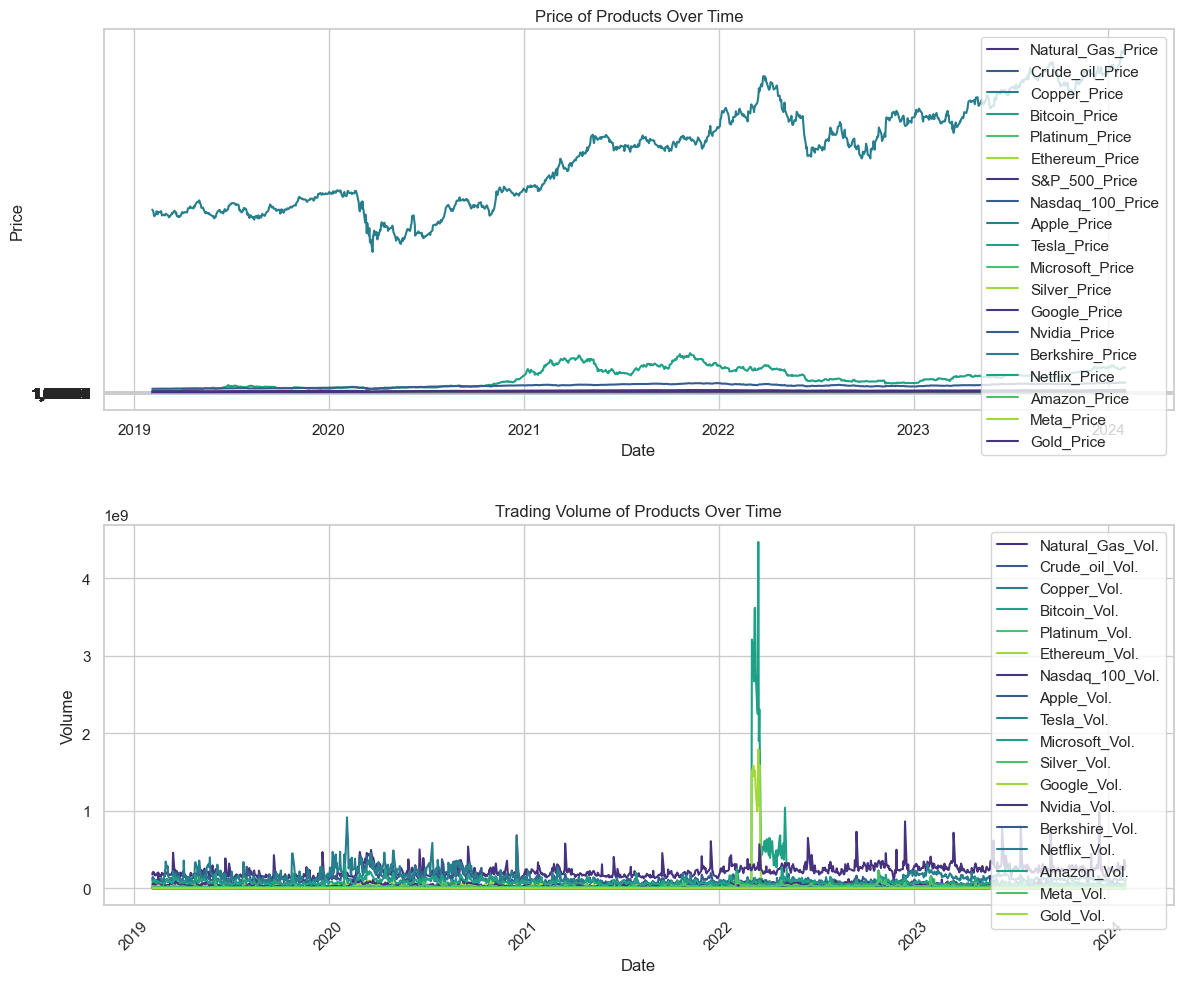

In [108]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create subplots for price and volume
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plotting price for each product
price_columns = [col for col in df.columns if 'Price' in col]
for col in price_columns:
    axes[0].plot(df['Date'], df[col], label=col)

axes[0].set_title('Price of Products Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Plotting volume for each product
vol_columns = [col for col in df.columns if 'Vol.' in col]
for col in vol_columns:
    axes[1].plot(df['Date'], df[col], label=col)

axes[1].set_title('Trading Volume of Products Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')
axes[1].legend()
axes[1].grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


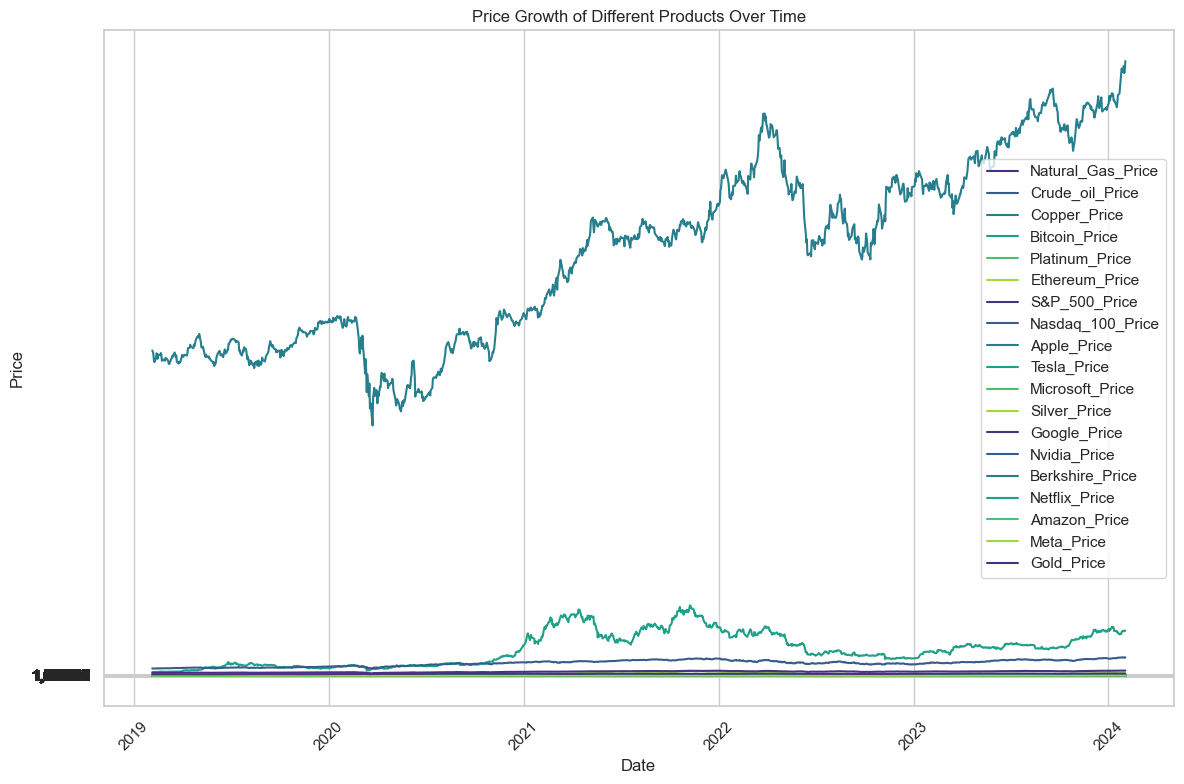

In [109]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Get price columns
price_columns = [col for col in df.columns if 'Price' in col]

# Create separate line plots for each price column
plt.figure(figsize=(12, 8))
for col in price_columns:
    plt.plot(df['Date'], df[col], label=col)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Growth of Different Products Over Time')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Each and Every Product in a over the time period for detail understanding....

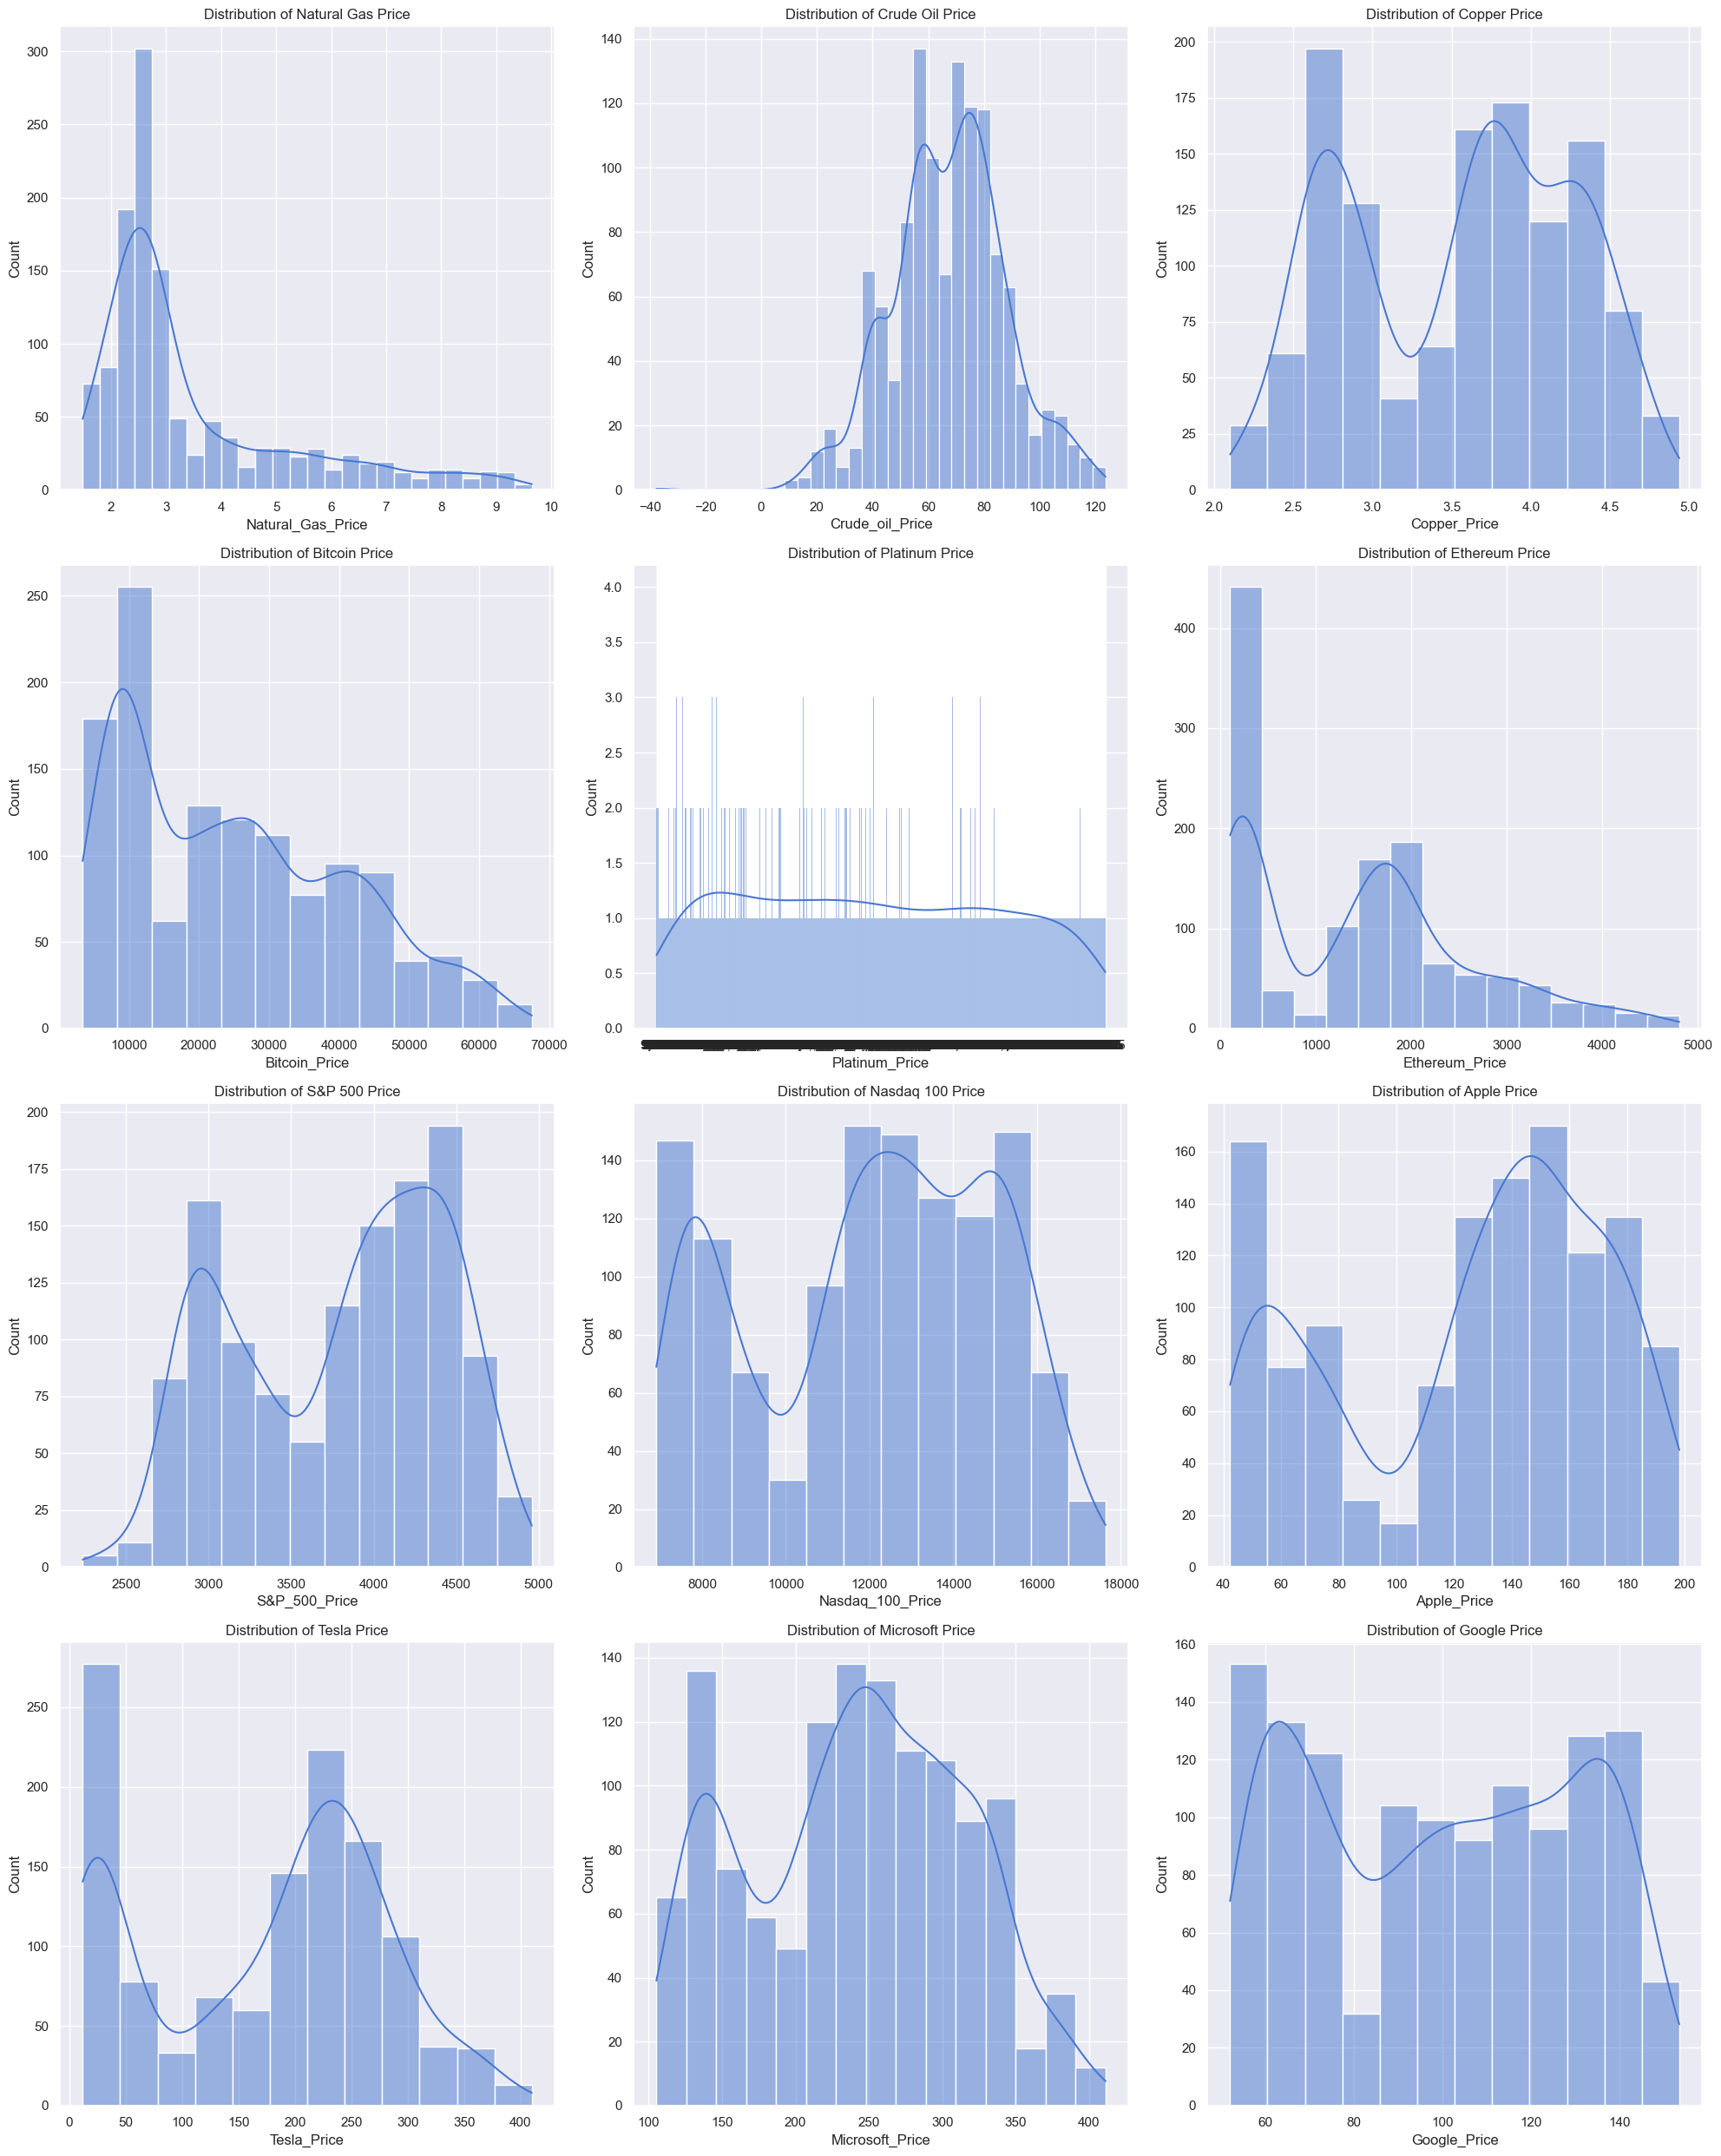

In [110]:
# Set seaborn theme and palette
sns.set_theme(style='darkgrid', palette='muted')

# Create subplots for each price column
plt.figure(figsize=(20, 25))

plt.subplot(431)
sns.histplot(df['Natural_Gas_Price'], kde=True)
plt.title('Distribution of Natural Gas Price')

plt.subplot(432)
sns.histplot(df['Crude_oil_Price'], kde=True)
plt.title('Distribution of Crude Oil Price')

plt.subplot(433)
sns.histplot(df['Copper_Price'], kde=True)
plt.title('Distribution of Copper Price')

plt.subplot(434)
sns.histplot(df['Bitcoin_Price'], kde=True)
plt.title('Distribution of Bitcoin Price')

plt.subplot(435)
sns.histplot(df['Platinum_Price'], kde=True)
plt.title('Distribution of Platinum Price')

plt.subplot(436)
sns.histplot(df['Ethereum_Price'], kde=True)
plt.title('Distribution of Ethereum Price')

plt.subplot(437)
sns.histplot(df['S&P_500_Price'], kde=True)
plt.title('Distribution of S&P 500 Price')

plt.subplot(438)
sns.histplot(df['Nasdaq_100_Price'], kde=True)
plt.title('Distribution of Nasdaq 100 Price')

plt.subplot(439)
sns.histplot(df['Apple_Price'], kde=True)
plt.title('Distribution of Apple Price')

plt.subplot(4,3,10)
sns.histplot(df['Tesla_Price'], kde=True)
plt.title('Distribution of Tesla Price')

plt.subplot(4,3,11)
sns.histplot(df['Microsoft_Price'], kde=True)
plt.title('Distribution of Microsoft Price')

plt.subplot(4,3,12)
sns.histplot(df['Google_Price'], kde=True)
plt.title('Distribution of Google Price')

plt.tight_layout()
plt.show()


Let see Gold vs Silver for a quick look...

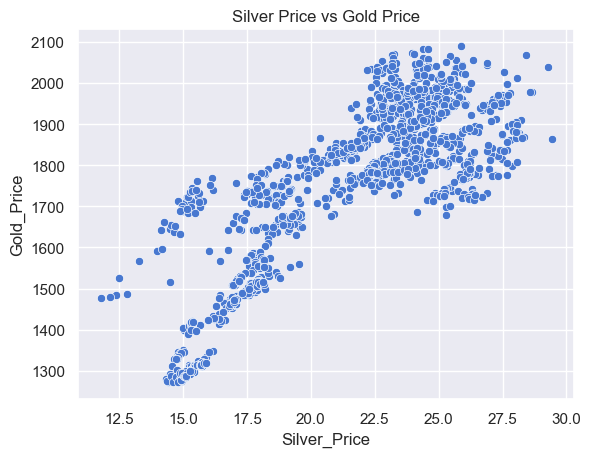

In [111]:
sns.scatterplot(x=df['Silver_Price'], y=df['Gold_Price'])
plt.title('Silver Price vs Gold Price')
plt.show()

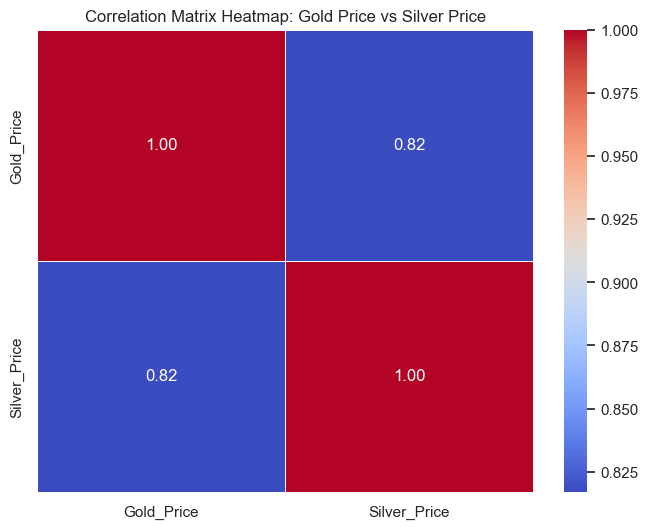

In [112]:
# Create a DataFrame with only 'Gold_Price' and 'Silver_Price' columns
gold_silver_df = df[['Gold_Price', 'Silver_Price']]

# Compute the correlation matrix
corr_gold_silver = gold_silver_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gold_silver, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap: Gold Price vs Silver Price')

# Show plot
plt.show()


In [113]:
# Check for missing values
print(df[['Gold_Price', 'Silver_Price']].isnull().sum())

# Check data types
print(df[['Gold_Price', 'Silver_Price']].dtypes)


Gold_Price      0
Silver_Price    0
dtype: int64
Gold_Price      float64
Silver_Price    float64
dtype: object


In [114]:
# Re-index the DataFrame to ensure correct column indexing
df.reset_index(drop=True, inplace=True)

# Compute the correlation matrix
corr_gold_silver = df[['Gold_Price', 'Silver_Price']].corr()


In [115]:
corr_gold_silver

,Gold_Price,Silver_Price
Gold_Price,1.000000,0.817131
Silver_Price,0.817131,1.000000


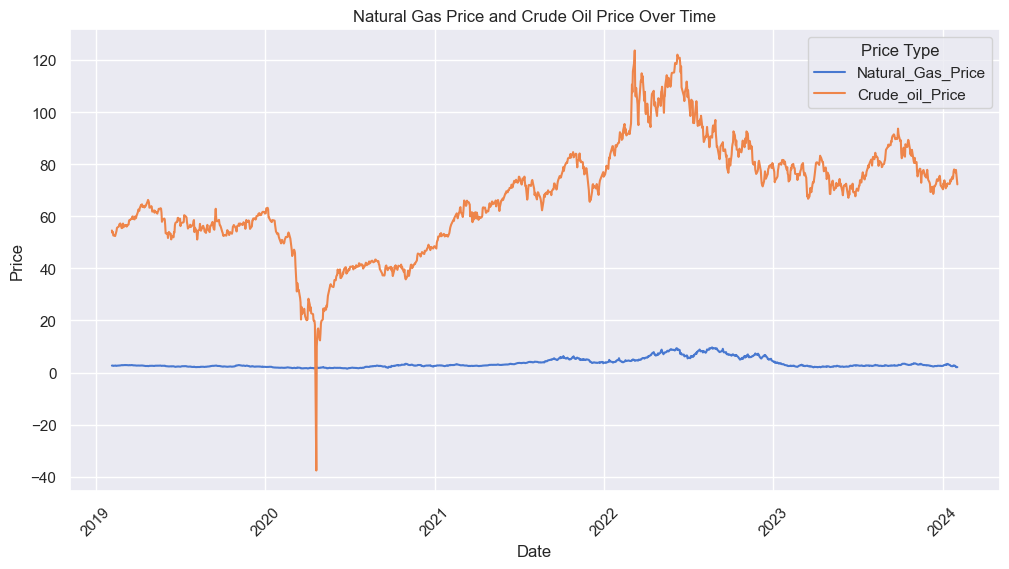

In [116]:
# Reshape the DataFrame to long format
df_long = pd.melt(df, id_vars=['Date'], value_vars=['Natural_Gas_Price', 'Crude_oil_Price'],
                  var_name='Type', value_name='Price')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='Price', hue='Type')
plt.title('Natural Gas Price and Crude Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.show()

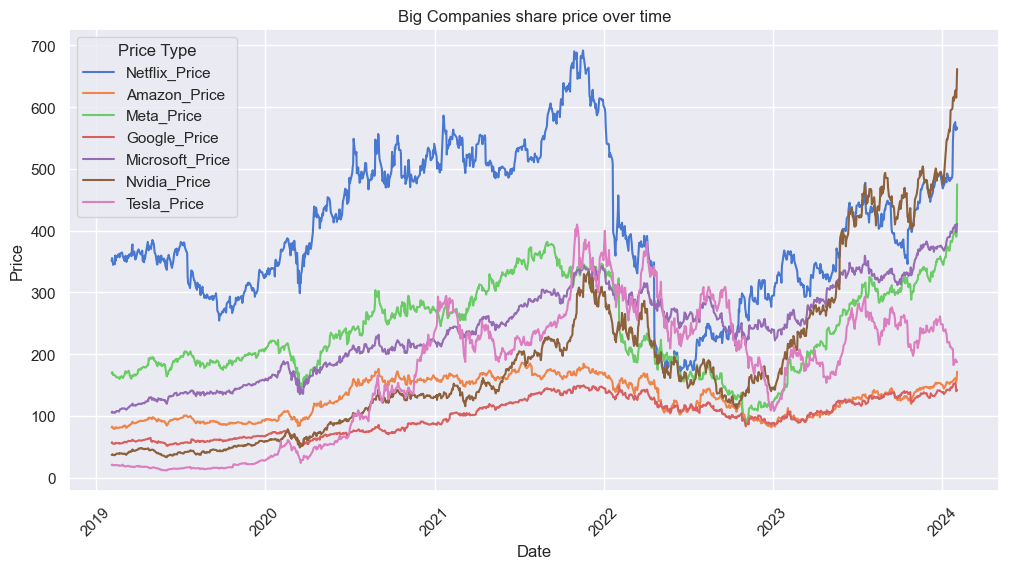

In [117]:
# Reshape the DataFrame to long format
df_long = pd.melt(df, id_vars=['Date'], value_vars=['Netflix_Price' , 'Amazon_Price' , 'Meta_Price' , 'Google_Price' , 'Microsoft_Price' , 'Nvidia_Price' , 'Tesla_Price'],
                  var_name='Type', value_name='Price')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='Price', hue='Type')
plt.title('Big Companies share price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.show()

netflix share price was higher in end of year 2021 & NVIDIA share price is currently higher in 2024 as per the EDA report..

Big Companies Share Price Over Time

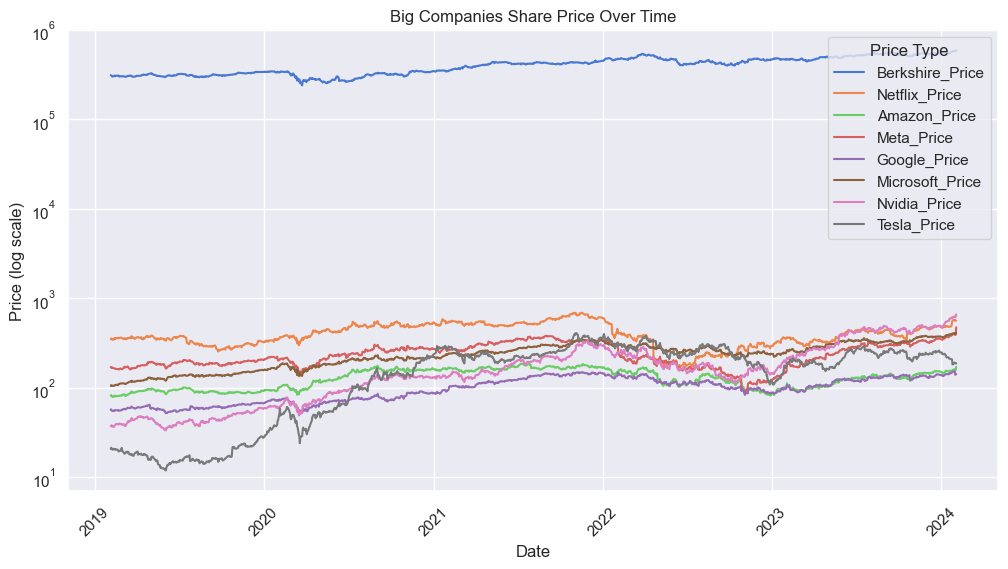

In [118]:
df_long = pd.melt(df, id_vars=['Date'], value_vars=['Berkshire_Price' , 'Netflix_Price' , 'Amazon_Price' , 'Meta_Price' , 'Google_Price' , 'Microsoft_Price' , 'Nvidia_Price' , 'Tesla_Price'],
                  var_name='Type', value_name='Price')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='Price', hue='Type')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Big Companies Share Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (log scale)')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.show()

 let see the growth in five years of companies

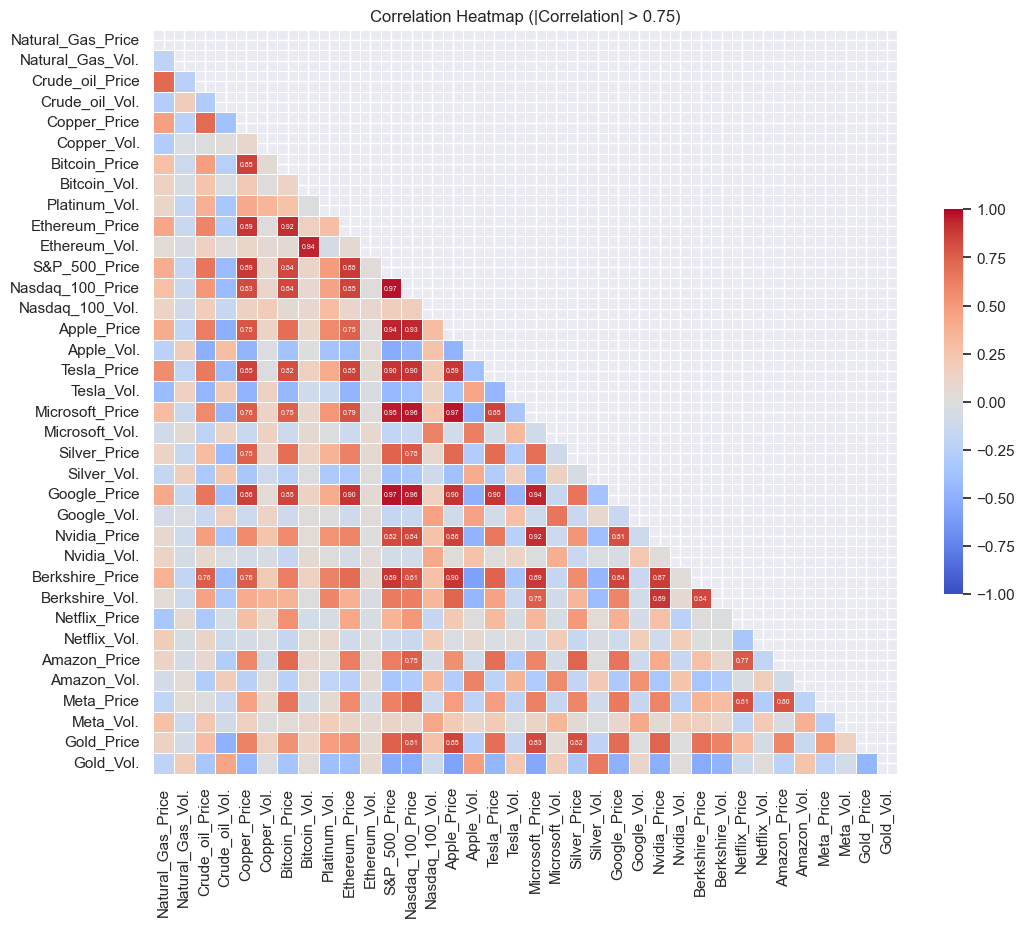

In [119]:
# Select numeric columns excluding 'Date'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Increase the figure size for better visibility
plt.figure(figsize=(12, 10))

# Create a mask to display only correlations > 0.75 or < -0.75
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True  # Optional: Mask the upper triangle

# Draw the heatmap with the mask and correct aspect ratio
# Decrease the annotation font size by adjusting `annot_kws`
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 5})  # Decrease font size here

# Annotate only values with absolute value > 0.75
for text in plt.gca().texts:
    t = float(text.get_text())
    if abs(t) < 0.75:
        text.set_text('')

plt.title('Correlation Heatmap (|Correlation| > 0.75)')
plt.show()


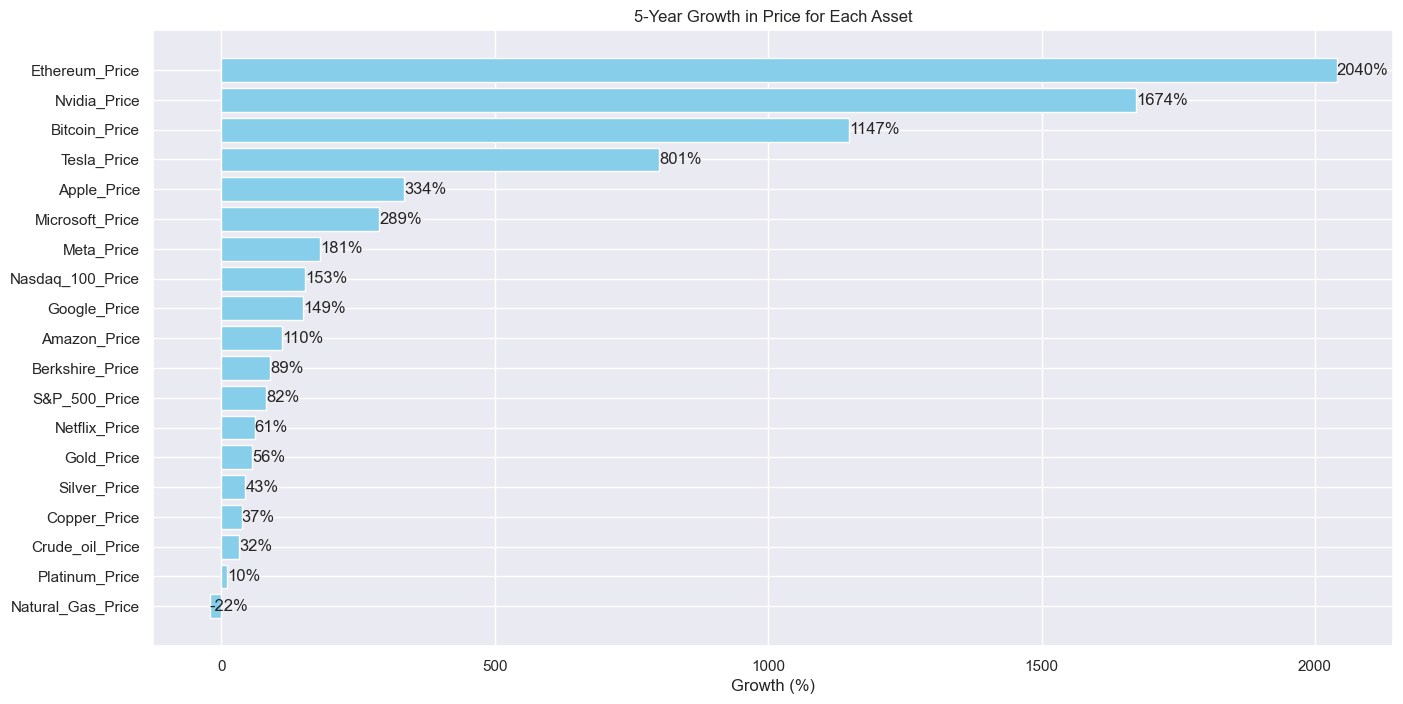

In [129]:
# Ensure only the columns present in df are processed
price_columns = [col for col in price_columns if col in df.columns]

# Convert data in price columns to numeric
df[price_columns] = df[price_columns].apply(pd.to_numeric, errors='coerce')

# Calculate initial and final prices
initial_prices = df[price_columns].iloc[0]  # Assuming the DataFrame is sorted by date, get the first row
final_prices = df[price_columns].iloc[-1]  # Get the last row

# Calculate growth percentage for each price column
growth = ((initial_prices - final_prices) / final_prices) * 100

# Prepare the data for plotting
growth_df = growth.reset_index()
growth_df.columns = ['Asset', 'Growth']
growth_df.sort_values('Growth', ascending=True, inplace=True)

# Plotting
plt.figure(figsize=(16, 8))
bars = plt.barh(growth_df['Asset'], growth_df['Growth'], color='skyblue')
plt.xlabel('Growth (%)')
plt.title('5-Year Growth in Price for Each Asset')
# Adding data labels
for bar in bars:
    plt.text(
        bar.get_width(),  # x-coordinate position of text
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position of text
        f"{bar.get_width():.0f}%",  # text
        va='center'  # center alignment
    )
plt.show()
